In [ ]:
!pip install -r "/content/drive/MyDrive/Colab Notebooks/LEVX_1km/requirements.txt"

In [ ]:
!pip install lazypredict

In [3]:
import plotly.express as px
import pandas as pd
import numpy as np
coor=pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/distan_lat42.896lon-8.415p4R4Km.csv")
px.set_mapbox_access_token("pk.eyJ1IjoiZ3JhbmFudHVpbiIsImEiOiJja3B4dGU4OTkwMTFmMm9ycnNhMjJvaGJqIn0.VWzx_PkD9A5cSUVsn_ijCA")
px.scatter_mapbox(coor, hover_data=['distance'],lat='lat', lon='lon',color='distance', title="Nearest points",
                           color_continuous_scale=px.colors.cyclical.IceFire,)

In [4]:
import pandas as pd

station = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/LESTY2018Y2022.csv",
                          usecols = ["time","visibility_o"],
                          parse_dates=["time"]).set_index("time")

station["visibility_o"].describe()

count    90838.000000
mean      8681.925141
std       2609.865894
min         48.000000
25%       8996.000000
50%       9994.000000
75%       9994.000000
max       9994.000000
Name: visibility_o, dtype: float64

**Station visibility to interval**

In [5]:
#visibility to interval
interval = pd.IntervalIndex.from_tuples([(-0.1,1000), (1000, 40000)])
labels = ['<= 1000 m', '> 1000 m']
station["vis_l"] = pd.cut(station["visibility_o"], bins=interval,retbins=False,
                        labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

print(station.sample(20))
print("\nVisibility frequencies.")
station["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

                     visibility_o      vis_l
time                                        
2018-03-07 07:30:00        9994.0   > 1000 m
2019-05-24 10:00:00        9994.0   > 1000 m
2018-10-24 09:00:00        9994.0   > 1000 m
2019-07-24 06:00:00         692.0  <= 1000 m
2022-01-03 18:30:00        3492.0   > 1000 m
2018-05-07 12:00:00        9994.0   > 1000 m
2021-01-01 08:00:00        9994.0   > 1000 m
2019-05-30 01:00:00        9994.0   > 1000 m
2022-11-13 02:30:00        9994.0   > 1000 m
2019-01-02 13:00:00        9994.0   > 1000 m
2020-04-15 13:00:00        9994.0   > 1000 m
2018-01-13 12:00:00        9994.0   > 1000 m
2018-01-02 11:30:00        4506.0   > 1000 m
2020-08-08 23:30:00        9994.0   > 1000 m
2021-04-01 15:00:00        9994.0   > 1000 m
2020-06-10 01:00:00        9994.0   > 1000 m
2021-06-23 15:00:00        9994.0   > 1000 m
2018-05-24 07:30:00        9994.0   > 1000 m
2019-07-19 14:30:00        9994.0   > 1000 m
2022-08-18 06:30:00        9994.0   > 1000 m

Visibilit

> 1000 m     97%
<= 1000 m     3%
nan           0%
Name: vis_l, dtype: object

**Forecast**

In [6]:
#Forecast d
#Load
mody2018 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2018.csv",parse_dates=["time"])
mody2019 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2019.csv",parse_dates=["time"])
mody2020 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2020.csv",parse_dates=["time"])
mody2021 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2021.csv",parse_dates=["time"])
mody2022 = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/LEST/input_files/lat42.896lon-8.415p4R4KmD1Y2022.csv",parse_dates=["time"])
model1k = pd.concat([mody2018,mody2019,mody2020,mody2021,mody2022]).drop(columns=["Unnamed: 0"]).set_index("time")

model1k

,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,lhflx0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,233.963104,0.0,1431.277588,8.529214,12.747702,103069.140625,284.533936,0.996536,14435.375977,-2.462172,...,27.370001,-0.000438,0.500000,0.624215,0.000000,0.624215,5684.005859,1578.303955,254.901123,277.214264
2018-01-02 01:00:00,232.617645,0.0,1450.688721,9.038249,13.097809,103024.101562,284.793640,0.991839,13233.881836,-1.087396,...,30.280001,-0.000438,0.000000,0.652011,0.000000,0.652011,5682.228027,1575.284058,255.174683,277.385498
2018-01-02 02:00:00,229.386154,0.0,1506.658691,9.148539,13.241504,102974.367188,284.805237,0.992409,12632.814453,-0.456407,...,8.658000,-0.000105,0.000000,0.703125,0.100000,0.703125,5680.491211,1573.386963,255.084564,278.089752
2018-01-02 03:00:00,224.010574,0.0,1530.089111,9.545937,13.720991,102908.781250,284.816742,0.996087,1235.833618,-0.508618,...,2.990000,-0.000125,0.000000,0.769529,0.200000,0.769529,5680.566895,1570.076050,254.978058,278.433868
2018-01-02 04:00:00,220.319962,0.0,1629.957764,8.721576,12.831500,102884.570312,284.905121,0.993239,14433.916016,-0.312250,...,1.244000,0.000562,0.296875,0.609375,0.600000,0.609375,5681.469238,1570.291016,255.305695,279.794739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-01-01 19:00:00,214.925400,0.0,1412.834229,3.840020,6.224229,101509.250000,282.401367,0.977776,24046.664062,1.376939,...,96.820000,-0.491957,0.300000,0.332929,0.000000,0.332929,5466.016113,1465.733032,252.778397,275.171875
2023-01-01 20:00:00,218.536026,0.0,1334.450562,3.384263,5.884864,101589.906250,282.391235,0.980421,24048.144531,1.292046,...,144.880005,-0.000320,0.100000,0.449521,0.000000,0.449521,5461.431152,1470.889771,251.670898,274.828064
2023-01-01 21:00:00,218.298325,0.0,1293.848755,3.525374,6.237169,101673.679688,282.288635,0.982895,24051.210938,0.569344,...,218.940002,0.002969,0.500000,0.357450,0.015625,0.500000,5455.578125,1474.774048,250.488861,274.894684


**Label meteorological model visibility. Concatenate Station and meteorological model. Few discrepancies between Station (half hours) and Station (only 0 o'clock hours). Less visibilty in half hours**  

In [9]:
#label meteorological model visbility points 0 and 1
model1k["visibility0_l"] = pd.cut(model1k["visibility0"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)
model1k["visibility1_l"] = pd.cut(model1k["visibility1"], bins=interval,retbins=False,labels=labels).map({a:b for a,b in zip(interval,labels)}).astype(str)

#concat station model
df_all1k = pd.concat([station,model1k],axis=1).dropna()
df_all1k = df_all1k.drop(columns=["visibility_o"])

#meteorological model frequencies
print("Meteorological model point 0")
print(df_all1k["visibility0_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))
print("\nMeteorological model point 1")
print(df_all1k["visibility1_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n)))

#Station frequencies
print("\nActual visibility frequencies o'clock hours")
df_all1k["vis_l"].value_counts(normalize=True).map(lambda n: '{:.0%}'.format(n))

Meteorological model point 0
> 1000 m     91%
<= 1000 m     9%
Name: visibility0_l, dtype: object

Meteorological model point 1
> 1000 m     92%
<= 1000 m     8%
Name: visibility1_l, dtype: object

Actual visibility frequencies o'clock hours


> 1000 m     98%
<= 1000 m     2%
Name: vis_l, dtype: object

**Scatter plot significant meteorological variables and vis_l**

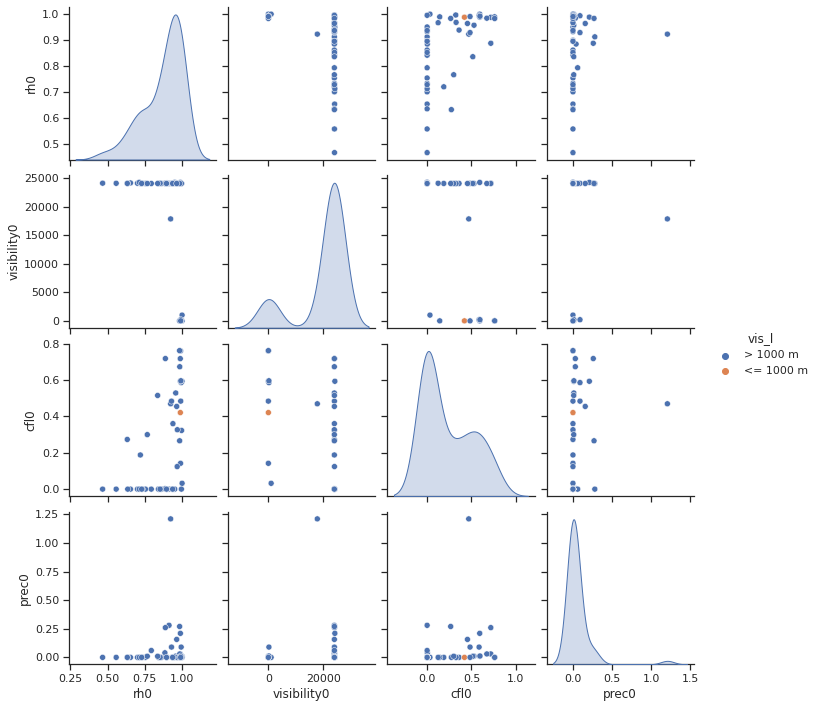

In [10]:
import seaborn as sns
sns.set_theme(style="ticks")

sns.pairplot(df_all1k[["vis_l","rh0","visibility0","cfl0","prec0"]].sample(50), hue="vis_l");

**Scatter plot 3 PCA variables and vis_l**

In [11]:
df_all1k.iloc[:,1:-2].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

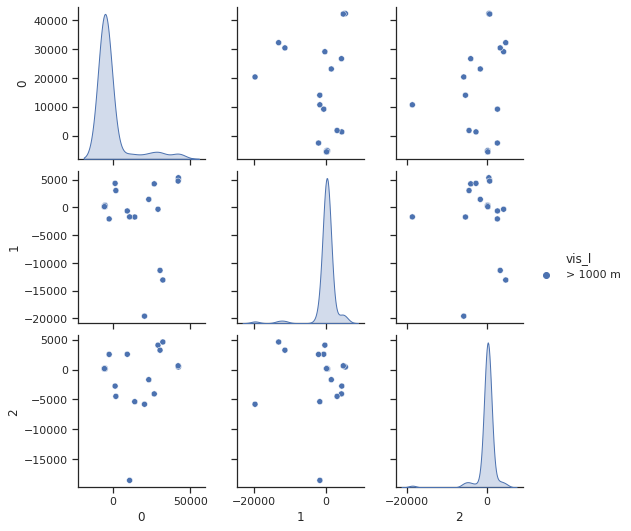

In [12]:
from sklearn.decomposition import PCA

df_pca = pd.DataFrame(PCA(n_components=3).fit_transform(df_all1k.iloc[:,1:-2]),
                                                        index =df_all1k.index)
df_pca["vis_l"] = df_all1k.vis_l
sns.pairplot(df_pca.sample(100), hue="vis_l");

**Meteorological model score Heidke Skill Score (HSS)**

In [13]:
from sklearn.metrics import classification_report

# HSS point 0
print("HSS point 0")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility0_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met0 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met0,2))

print("\nQuality report Meteorological model point 0")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility0_l,output_dict=True)).T)

# HSS point 1
print("\nHSS point 1")
cm = pd.crosstab(df_all1k.vis_l,df_all1k.visibility1_l ,margins=True,)
print(cm)
a = cm.values[0,0]
b = cm.values[1,0]
c = cm.values[0,1]
d = cm.values[1,1]
HSS_met1 = 2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d))
print("Heidke Skill Score:",round(HSS_met1,2))

print("\nQuality report Meteorological model point 1")
print(pd.DataFrame(classification_report(df_all1k.vis_l,df_all1k.visibility1_l,output_dict=True)).T)

HSS point 0
visibility0_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            453       626   1079
> 1000 m            3413     38984  42397
All                 3866     39610  43476
Heidke Skill Score: 0.15

Quality report Meteorological model point 0
              precision    recall  f1-score       support
<= 1000 m      0.117175  0.419833  0.183215   1079.000000
> 1000 m       0.984196  0.919499  0.950748  42397.000000
accuracy       0.907098  0.907098  0.907098      0.907098
macro avg      0.550686  0.669666  0.566982  43476.000000
weighted avg   0.962678  0.907098  0.931699  43476.000000

HSS point 1
visibility1_l  <= 1000 m  > 1000 m    All
vis_l                                    
<= 1000 m            453       626   1079
> 1000 m            3112     39285  42397
All                 3565     39911  43476
Heidke Skill Score: 0.16

Quality report Meteorological model point 1
              precision    recall  f1-score       support
<= 1000 m

**Test association between observed variable and machine learning forecast (Pearson’s chi square test). Significance level (alpha) = 0.01**

In [14]:
from scipy.stats import chi2_contingency

#only cm point 1 similar point 0

#stadistic(sta), pvalue (p), degrees of freedom (dof) and expected values (exp)
sta, p, dof, exp = chi2_contingency(cm.iloc[0:2,0:2])

#degrees of freedoom (rows-1)*(columns-1) to test association between two variables
alpha = 0.01
print('\np-value:',p)
print('Significance level:',alpha)
print('Degres of of freedom: ',dof)
print("Statistic",sta)

if p<=alpha:
    print("Reject H0,There is an association between machine learning forecast and observed values")
else:
    print("Retain H0,There is no association between machine learning forecast and observed values")


p-value: 0.0
Significance level: 0.01
Degres of of freedom:  1
Statistic 1673.004783078518
Reject H0,There is an association between machine learning forecast and observed values


**Quality report meorologic model point 0 and confusion matrix**

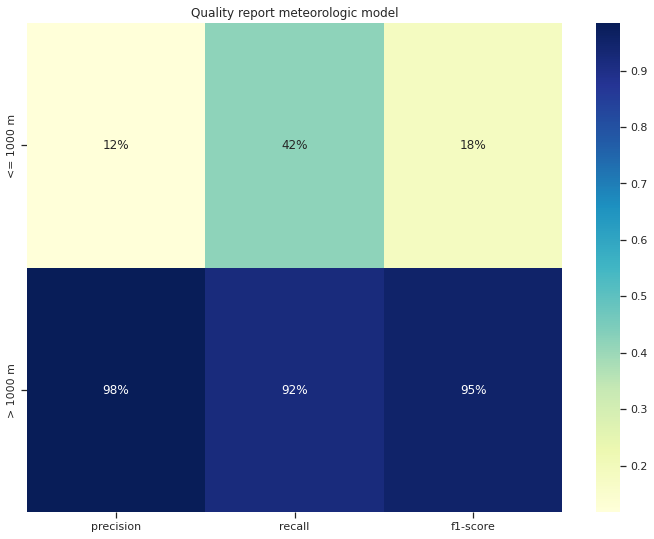

In [15]:
from sklearn.metrics import classification_report
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Quality report meteorologic model")
import seaborn as sns
cr=pd.DataFrame(classification_report(df_all1k.vis_l, df_all1k.visibility0_l,output_dict=True)).T
sns.heatmap(cr[:-3].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.0%');


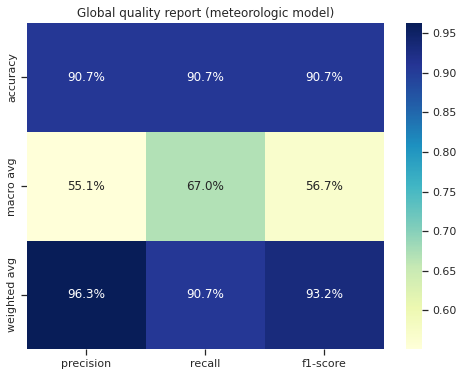

In [16]:
plt.figure(figsize=(8, 6))
plt.title("Global quality report (meteorologic model)")
sns.heatmap(cr[-3:].drop(columns=["support"]),annot=True,cmap="YlGnBu",fmt='.1%');

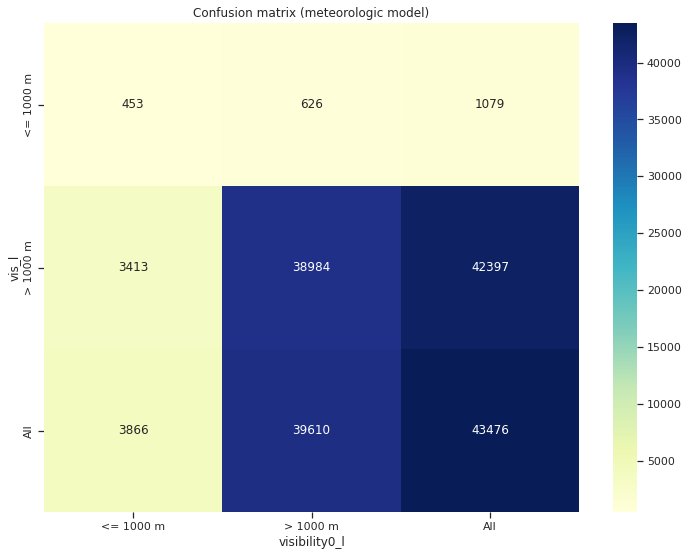

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 9))
plt.title("Confusion matrix (meteorologic model)")
import seaborn as sns
global_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l,margins=True,)
sns.heatmap(global_sc,annot=True,cmap="YlGnBu",fmt='.0f');

<ipython-input-18-c7e1f60e5f14>:7: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



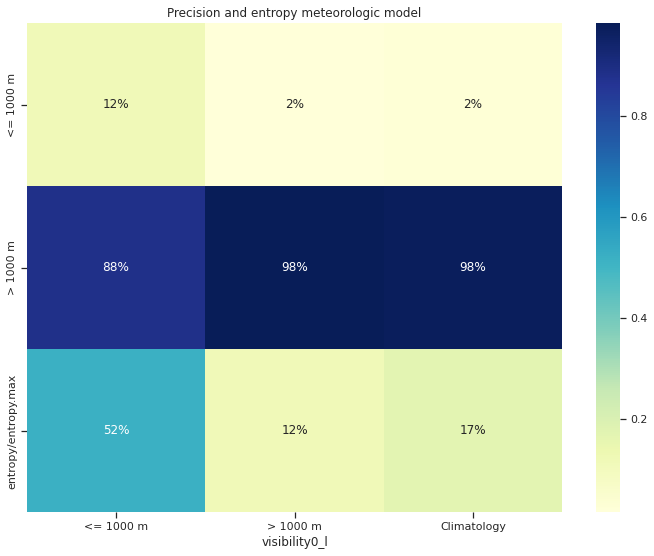

In [18]:
import math
from scipy.stats import entropy

plt.figure(figsize=(12, 9))
plt.title("Precision and entropy meteorologic model")
column_sc=pd.crosstab(df_all1k.vis_l, df_all1k.visibility0_l, margins=True,normalize="columns")
column_sc=column_sc.append(pd.DataFrame(entropy(column_sc,base=2)/(math.log2(column_sc.shape[0])),columns=["entropy/entropy.max"],
                    index=column_sc.columns).T).rename(columns={"All":"Climatology"})
sns.heatmap(column_sc,annot=True,cmap="YlGnBu",fmt='.0%');

In [19]:
df_all1k = df_all1k.drop(columns=["visibility0_l","visibility1_l"])
df_all1k

,vis_l,dir0,snow_prec0,snowlevel0,mod0,wind_gust0,mslp0,temp0,rh0,visibility0,...,cape3,cin3,cfh3,cfl3,cfm3,cft3,HGT5003,HGT8503,T5003,T8503
time,,,,,,,,,,,,,,,,,,,,,
2018-01-02 00:00:00,> 1000 m,233.963104,0.0,1431.277588,8.529214,12.747702,103069.140625,284.533936,0.996536,14435.375977,...,27.370001,-0.000438,0.500000,0.624215,0.000000,0.624215,5684.005859,1578.303955,254.901123,277.214264
2018-01-02 01:00:00,> 1000 m,232.617645,0.0,1450.688721,9.038249,13.097809,103024.101562,284.793640,0.991839,13233.881836,...,30.280001,-0.000438,0.000000,0.652011,0.000000,0.652011,5682.228027,1575.284058,255.174683,277.385498
2018-01-02 02:00:00,> 1000 m,229.386154,0.0,1506.658691,9.148539,13.241504,102974.367188,284.805237,0.992409,12632.814453,...,8.658000,-0.000105,0.000000,0.703125,0.100000,0.703125,5680.491211,1573.386963,255.084564,278.089752
2018-01-02 03:00:00,> 1000 m,224.010574,0.0,1530.089111,9.545937,13.720991,102908.781250,284.816742,0.996087,1235.833618,...,2.990000,-0.000125,0.000000,0.769529,0.200000,0.769529,5680.566895,1570.076050,254.978058,278.433868
2018-01-02 04:00:00,> 1000 m,220.319962,0.0,1629.957764,8.721576,12.831500,102884.570312,284.905121,0.993239,14433.916016,...,1.244000,0.000562,0.296875,0.609375,0.600000,0.609375,5681.469238,1570.291016,255.305695,279.794739
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-12-30 19:00:00,> 1000 m,203.312912,0.0,2052.007812,13.638724,21.316725,101481.078125,287.015625,0.955191,15237.156250,...,13.450000,-0.153680,0.200000,0.718750,0.109375,0.718750,5590.645020,1488.197021,258.165497,280.460114
2022-12-30 20:00:00,> 1000 m,201.815460,0.0,2043.720459,13.186010,22.361063,101532.601562,287.144867,0.945404,15238.056641,...,17.870001,-0.202000,0.100000,0.726562,0.023438,0.726562,5594.009766,1491.375977,257.989868,280.390503
2022-12-30 21:00:00,> 1000 m,200.847214,0.0,2055.141113,12.703165,21.816742,101544.117188,287.186951,0.940966,12834.199219,...,25.750000,-0.350734,0.000000,0.796875,0.062500,0.796875,5593.878906,1492.337036,257.925873,280.522491


**Machine learning**

In [20]:
#x variables
df_all1k.iloc[:,1:].columns

Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0', 'lwflx0', 'conv_prec0',
       'prec0', 'swflx0', 'shflx0', 'cape0', 'cin0', 'cfh0', 'cfl0', 'cfm0',
       'cft0', 'HGT5000', 'HGT8500', 'T5000', 'T8500', 'dir1', 'snow_prec1',
       'snowlevel1', 'mod1', 'wind_gust1', 'mslp1', 'temp1', 'rh1',
       'visibility1', 'lhflx1', 'lwflx1', 'conv_prec1', 'prec1', 'swflx1',
       'shflx1', 'cape1', 'cin1', 'cfh1', 'cfl1', 'cfm1', 'cft1', 'HGT5001',
       'HGT8501', 'T5001', 'T8501', 'dir2', 'snow_prec2', 'snowlevel2', 'mod2',
       'wind_gust2', 'mslp2', 'temp2', 'rh2', 'visibility2', 'lhflx2',
       'lwflx2', 'conv_prec2', 'prec2', 'swflx2', 'shflx2', 'cape2', 'cin2',
       'cfh2', 'cfl2', 'cfm2', 'cft2', 'HGT5002', 'HGT8502', 'T5002', 'T8502',
       'dir3', 'snow_prec3', 'snowlevel3', 'mod3', 'wind_gust3', 'mslp3',
       'temp3', 'rh3', 'visibility3', 'lhflx3', 'lwflx3', 'conv_prec3',
       'prec3', 'swflx3', '

In [ ]:
from sklearn.model_selection import train_test_split
import lazypredict
from lazypredict.Supervised import LazyClassifier

# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )


multiple_model = LazyClassifier(verbose =0, ignore_warnings = True,predictions=True)
models,predictions = multiple_model.fit(X_train,X_test,y_train,y_test)

100%|██████████| 29/29 [00:48<00:00,  1.66s/it]


In [ ]:
models

**ML LGBMClassifier**


Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m         94       125   219
> 1000 m         188      8289  8477
All              282      8414  8696
Heidke Skill Score: 0.36

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.333333  0.429224  0.375250   219.000000
> 1000 m       0.985144  0.977822  0.981469  8477.000000
accuracy       0.964006  0.964006  0.964006     0.964006
macro avg      0.659239  0.703523  0.678359  8696.000000
weighted avg   0.968729  0.964006  0.966202  8696.000000

Confusion matrix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m         94       120   214
> 1000 m         227      8255  8482
All              321      8375  8696
Heidke Skill Score: 0.33

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.292835  0.4392

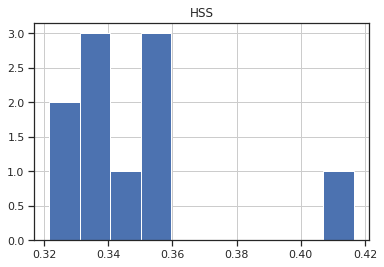

In [21]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed(1)
np.random.seed(1)
HSS_ml = []

for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #ml model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)
  #ml_model = BernoulliNB().fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion matrix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_ml.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_ml[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning statistics")
# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000

print(pd.DataFrame(HSS_ml,columns=["HSS"]).describe())

sta, p = shapiro(HSS_ml)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_ml,columns=["HSS"]).hist();

**T test (1sample) compare machine learning HSS in a sample (n=10) versus meteorological model HSS at point 0 (0.15) and at point 1 (0.16). the alternative hypothesis is: the mean of HSS of the underlying distribution of the sample is greater than the given population HSS from meteorological model (popmean). Significance level (alpha) = 0.01**

In [22]:
import scipy.stats as stats

alpha = 0.01

#popmean point 1
sta0, p_value0 = stats.ttest_1samp(HSS_ml, popmean=0.16, alternative="greater")

print("\nalpha: ",alpha)
print("\nHSS list from machine learning test:",np.round(HSS_ml,2))
print("\np_value point 0:",p_value0)

if p_value0 < alpha:    
    print("\nwe are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0")
    print("\nwe are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0")
else:
    print("\nwe are accepting null hypothesis:  H0 HSS mean machine learning = HSS meteorological model point 0")


alpha:  0.01

HSS list from machine learning test: [0.36 0.33 0.35 0.33 0.35 0.34 0.42 0.32 0.32 0.35]

p_value point 0: 1.3438801890190811e-05

we are rejecting null hypothesis  H0:  HSS mean machine learning= HSS meteorological model point 0

we are accepting alternative hypothesis: HSS mean machine learning is greater than HSS meteorological point 0


**Add time features**

In [23]:
df_all1k["hour"] = df_all1k.index.hour
df_all1k["month"] = df_all1k.index.month
df_all1k["dayofyear"] = df_all1k.index.dayofyear
df_all1k["weekofyear"] = df_all1k.index.isocalendar().week.astype(int)

# variables X
df_all1k.iloc[:,1:].columns


Index(['dir0', 'snow_prec0', 'snowlevel0', 'mod0', 'wind_gust0', 'mslp0',
       'temp0', 'rh0', 'visibility0', 'lhflx0',
       ...
       'cfm3', 'cft3', 'HGT5003', 'HGT8503', 'T5003', 'T8503', 'hour', 'month',
       'dayofyear', 'weekofyear'],
      dtype='object', length=104)

**LGBMClassifier with time variables**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m         96       123   219
> 1000 m         154      8323  8477
All              250      8446  8696
Heidke Skill Score: 0.39

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.384000  0.438356  0.409382   219.000000
> 1000 m       0.985437  0.981833  0.983632  8477.000000
accuracy       0.968146  0.968146  0.968146     0.968146
macro avg      0.684718  0.710095  0.696507  8696.000000
weighted avg   0.970290  0.968146  0.969170  8696.000000

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m         93       121   214
> 1000 m         175      8307  8482
All              268      8428  8696
Heidke Skill Score: 0.37

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.347015  0.434579

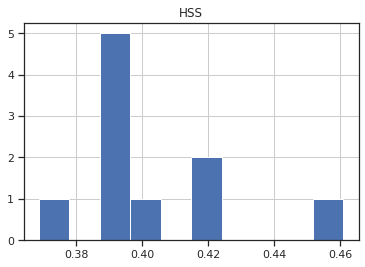

In [24]:
from lightgbm.sklearn import LGBMClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_t = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = LGBMClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_t.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_t[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_t,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_t)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_t,columns=["HSS"]).hist();

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [ ]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_ml, HSS_t, alternative="less")

print("\nHSS without time variables:", np.round(HSS_ml,3))
print("\nHSS with time variables:", np.round(HSS_t,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs")
else:
    print("\nwe are accepting null hypothesis:  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables")


HSS without time variables: [0.506 0.521 0.539 0.543 0.571 0.488 0.52  0.504 0.539 0.482]

HSS with time variables: [0.54  0.565 0.607 0.557 0.598 0.525 0.566 0.539 0.576 0.523]

alpha:  0.01

p_value point:  5.338571048331607e-06

we are rejecting null hypothesis  H0: HSS mean machine learning without time variables = HSS mean machine learning with time variables

we are accepting alternative hypothesis: the HSS mean of the sample without time variables inputs is less than the HSS mean of the sample with time variables inputs


In [25]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 1.3%
snow_prec0: 0.0%
snowlevel0: 1.1%
mod0: 0.7%
wind_gust0: 1.4%
mslp0: 1.1%
temp0: 1.1%
rh0: 1.6%
visibility0: 1.4%
lhflx0: 0.9%
lwflx0: 0.6%
conv_prec0: 0.2%
prec0: 0.9%
swflx0: 0.4%
shflx0: 0.9%
cape0: 1.1%
cin0: 1.0%
cfh0: 0.8%
cfl0: 0.5%
cfm0: 1.2%
cft0: 0.8%
HGT5000: 0.8%
HGT8500: 0.8%
T5000: 1.0%
T8500: 1.2%
dir1: 1.3%
snow_prec1: 0.0%
snowlevel1: 1.1%
mod1: 0.7%
wind_gust1: 1.1%
mslp1: 1.3%
temp1: 0.9%
rh1: 1.3%
visibility1: 1.7%
lhflx1: 1.1%
lwflx1: 0.7%
conv_prec1: 0.1%
prec1: 2.1%
swflx1: 0.7%
shflx1: 1.6%
cape1: 0.6%
cin1: 1.1%
cfh1: 1.5%
cfl1: 0.8%
cfm1: 0.4%
cft1: 0.5%
HGT5001: 0.8%
HGT8501: 0.6%
T5001: 0.9%
T8501: 0.6%
dir2: 1.6%
snow_prec2: 0.0%
snowlevel2: 1.3%
mod2: 0.9%
wind_gust2: 1.9%
mslp2: 1.0%
temp2: 0.7%
rh2: 1.1%
visibility2: 1.6%
lhflx2: 1.2%
lwflx2: 1.1%
conv_prec2: 0.3%
prec2: 2.1%
swflx2: 0.5%
shflx2: 1.1%
cape2: 0.9%
cin2: 1.1%
cfh2: 1.1%
cfl2: 0.9%
cfm2: 0.6%
cft2: 0.8%
HGT5002: 0.9%
HGT8502: 1.3%
T5002: 0.7%
T8502: 1.2%
dir3: 1.0%
snow_prec3: 0.

In [26]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEST_d1.al", 'wb'))

Pipeline(steps=[('ml_model', LGBMClassifier(n_estimators=200))])


**ExtraTreesClassifier too big to be upload at github!!**


Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        108       111   219
> 1000 m          73      8404  8477
All              181      8515  8696
Heidke Skill Score: 0.53

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.596685  0.493151  0.540000   219.000000
> 1000 m       0.986964  0.991388  0.989171  8477.000000
accuracy       0.978841  0.978841  0.978841     0.978841
macro avg      0.791825  0.742270  0.764586  8696.000000
weighted avg   0.977135  0.978841  0.977859  8696.000000

Confusion marix  (Machine Learning)

col_0      <= 1000 m  > 1000 m   All
vis_l                               
<= 1000 m        100       125   225
> 1000 m          68      8403  8471
All              168      8528  8696
Heidke Skill Score: 0.5

Quality report (Machine Learning)

              precision    recall  f1-score      support
<= 1000 m      0.595238  0.444444 

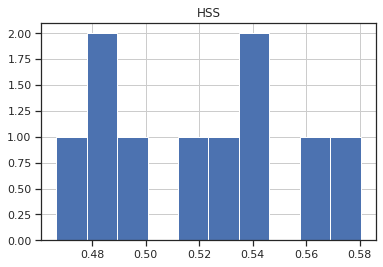

In [27]:
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from sklearn.metrics import classification_report
from scipy.stats import shapiro


# X and Y
Y = df_all1k.vis_l
X = df_all1k.iloc[:,1:]

# loop random seed (1)
np.random.seed(1)
HSS_plus = []
for t in range (0,10):
  #split variables
  X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size=0.2, )

  # Resample
  X_res, y_res = SMOTE().fit_resample(X_train,y_train)

  #machine learning model
  ml_model = ExtraTreesClassifier(n_estimators=200).fit(X_res,y_res)

  #Confussion matrix
  print("\nConfusion marix  (Machine Learning)\n")
  cm = pd.crosstab(y_test, ml_model.predict(X_test),margins=True,)
  print(cm)
  a = cm.values[0,0]
  b = cm.values[1,0]
  c = cm.values[0,1]
  d = cm.values[1,1]
  HSS_plus.append(2*(a*d-b*c)/((a+c)*(c+d)+(a+b)*(b+d)))
  print("Heidke Skill Score:",round(HSS_plus[t],2))

  #quality report
  print("\nQuality report (Machine Learning)\n")
  print(pd.DataFrame(classification_report(y_test, ml_model.predict(X_test),output_dict=True)).T)

print("\nHSS machine learning stadistics")
print(pd.DataFrame(HSS_plus,columns=["HSS"]).describe())

# if p-value is lower than 1%, we can reject the null hypothesis of the normality of the dataset
#sample less 5000
sta, p = shapiro(HSS_plus)
print("\np value:",p)
#significance level alpha=0.01
alpha = 0.01
if p>alpha:
  print("Accept null hypothesis: normal distribution variable HSS in the samples")
else:
  print("Reject null Hypothesis. Alternative hypothesis variable HSS no normal distribution in samples")  

pd.DataFrame(HSS_plus,columns=["HSS"]).hist();

In [28]:
feature_importances = ml_model.feature_importances_
total_sum = sum(feature_importances)
feature_importances_perc = [(importance/total_sum)*100 for importance in feature_importances]
# Print the feature importances as a percentage of total feature importance

for name, importance in zip(X.columns, feature_importances_perc):
    print(f"{name}: {importance:.1f}%")

dir0: 0.8%
snow_prec0: 0.0%
snowlevel0: 0.8%
mod0: 1.7%
wind_gust0: 2.4%
mslp0: 0.8%
temp0: 1.1%
rh0: 2.5%
visibility0: 2.7%
lhflx0: 1.4%
lwflx0: 0.7%
conv_prec0: 0.0%
prec0: 0.3%
swflx0: 1.1%
shflx0: 0.8%
cape0: 0.6%
cin0: 0.3%
cfh0: 0.5%
cfl0: 0.7%
cfm0: 0.5%
cft0: 0.6%
HGT5000: 0.7%
HGT8500: 0.7%
T5000: 0.7%
T8500: 0.8%
dir1: 0.9%
snow_prec1: 0.0%
snowlevel1: 0.7%
mod1: 2.0%
wind_gust1: 2.2%
mslp1: 0.8%
temp1: 1.0%
rh1: 2.5%
visibility1: 2.7%
lhflx1: 1.6%
lwflx1: 0.7%
conv_prec1: 0.0%
prec1: 0.3%
swflx1: 1.1%
shflx1: 1.0%
cape1: 0.6%
cin1: 0.3%
cfh1: 0.5%
cfl1: 0.8%
cfm1: 0.5%
cft1: 0.6%
HGT5001: 0.8%
HGT8501: 0.8%
T5001: 0.7%
T8501: 0.8%
dir2: 0.9%
snow_prec2: 0.0%
snowlevel2: 0.8%
mod2: 1.6%
wind_gust2: 2.6%
mslp2: 0.8%
temp2: 0.9%
rh2: 2.2%
visibility2: 2.0%
lhflx2: 1.7%
lwflx2: 0.8%
conv_prec2: 0.1%
prec2: 0.3%
swflx2: 0.9%
shflx2: 0.8%
cape2: 0.6%
cin2: 0.3%
cfh2: 0.5%
cfl2: 0.9%
cfm2: 0.5%
cft2: 0.8%
HGT5002: 0.7%
HGT8502: 0.8%
T5002: 0.7%
T8502: 0.8%
dir3: 0.9%
snow_prec3: 0.

**T test two related samples. This is a test for the null hypothesis that two related samples have identical HSS means. Alternative hypothesis the HSS mean of the distribution underlying the sample without time variables is less than the HSS mean of the distribution underlying the sample with time variables. Significance level (alpha) = 0.01**

In [29]:
from scipy import stats

alpha = 0.01
sta, p_value = stats.ttest_rel(HSS_t, HSS_plus, alternative="less")

print("\nHSS with LGBMClassifier:", np.round(HSS_t,3))
print("\nHSS with ExtraTreesClassifier:", np.round(HSS_plus,3))
print("\nalpha: ",alpha)
print("\np_value point: ",p_value)

if p_value < alpha:    
    print("\nwe are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier")
    print("\nwe are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier")
else:
    print("\nwe are accepting null hypothesis:  H0: LGBMClassifier = HSS mean ExtraTreesClassifier")


HSS with LGBMClassifier: [0.393 0.369 0.4   0.391 0.391 0.417 0.461 0.394 0.392 0.418]

HSS with ExtraTreesClassifier: [0.529 0.498 0.546 0.466 0.512 0.535 0.58  0.485 0.564 0.478]

alpha:  0.01

p_value point:  7.735482228238495e-07

we are rejecting null hypothesis  H0: HSS mean LGBMClassifier = HSS mean ExtraTreesClassifier

we are accepting alternative hypothesis: the HSS mean of the  LGBMClassifier is less than the HSS mean of ExtraTreesClassifier


In [ ]:
import pickle
from sklearn.pipeline import Pipeline

estimators = [('ml_model', ml_model)]
pipe = Pipeline(estimators)
print(pipe)
al_file={"x_var":X.columns,"coor":coor,"pipe":pipe}
pickle.dump(al_file, open("vis_LEST_d1.al", 'wb'))

Pipeline(steps=[('ml_model', ExtraTreesClassifier(n_estimators=200))])
